In [ ]:
import pandas as pd

# Leer el archivo CSV en un DataFrame
df = pd.read_csv('/content/drive/MyDrive/XIA_ARENA/bbmodels/datasets/challenge-2018-task-1-2-training_metadata_2024-08-19.csv')

df_filtered = df[['isic_id', 'diagnosis','benign_malignant']]
#df_filtered = df_filtered.drop_duplicates(subset='isic_id', keep='first')

# Mostrar las primeras filas del DataFrame filtrado para verificar
print(df_filtered.head(10))



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/XIA_ARENA/bbmodels/datasets_ISIC/challenge-2018-task-1-2-training_metadata_2024-08-19.csv'

In [ ]:
diagnosis_classes = df_filtered['diagnosis'].unique()
print('Clases en diagnosis:', diagnosis_classes)

Clases en diagnosis: ['nevus' 'melanoma' 'seborrheic keratosis']


In [ ]:
# Ver las clases únicas en la columna 'benign_malignant'
benign_malignant_classes = df_filtered['benign_malignant'].unique()
print('Clases en benign_malignant:', benign_malignant_classes)


Clases en benign_malignant: ['benign' 'malignant' 'indeterminate' 'indeterminate/benign']


In [ ]:
# Obtener el número de filas en el DataFrame
num_filas = df_filtered.shape[0]
print('Número de filas en el DataFrame:', num_filas)


Número de filas en el DataFrame: 10376


In [ ]:
import os

def list_file_formats(directory):
    # Diccionario para almacenar las extensiones y sus conteos
    file_formats = {}

    # Recorre todos los archivos en la carpeta y subcarpetas
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Obtiene la extensión del archivo
            file_extension = os.path.splitext(file)[1]

            # Cuenta la aparición de cada extensión
            if file_extension in file_formats:
                file_formats[file_extension] += 1
            else:
                file_formats[file_extension] = 1

    return file_formats

# Carpeta donde quieres determinar el formato de archivos
directory = '/content/drive/MyDrive/XIA_ARENA/bbmodels/datasets/ISIC2018_Task1-2_Training_Input'

# Llamada a la función
file_formats = list_file_formats(directory)

# Muestra los formatos encontrados y sus conteos
for extension, count in file_formats.items():
    print(f"Formato: {extension if extension else 'Sin extensión'}, Cantidad: {count}")


Formato: .jpg, Cantidad: 2594
Formato: .txt, Cantidad: 2


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Rutas de las carpetas donde están las imágenes originales y las ground truths
original_folder = '/content/drive/MyDrive/XIA_ARENA/bbmodels/datasets/ISIC2018_Task1-2_Training_Input'
groundtruth_folder = '/content/drive/MyDrive/XIA_ARENA/bbmodels/datasets/ISIC2018_Task1_Training_GroundTruth'


# Número de imágenes a mostrar
n = 10  # Puedes ajustar este valor

# Crear una figura con subplots, 2 columnas por cada imagen (1 para la original, 1 para el ground truth)
fig, axes = plt.subplots(n, 2, figsize=(10, 5 * n))

# Iterar sobre las primeras n imágenes del DataFrame
for i, row in enumerate(df_filtered.head(n).itertuples(index=False)):
    isic_id = row.isic_id
    diagnosis = row.diagnosis
    benign_malignant = row.benign_malignant

    # Rutas de la imagen original y la ground truth
    original_path = os.path.join(original_folder, f"{isic_id}.jpg")
    groundtruth_path = os.path.join(groundtruth_folder, f"{isic_id}_segmentation.png")

    # Leer las imágenes usando PIL
    original_img = Image.open(original_path)
    groundtruth_img = Image.open(groundtruth_path)

    # Mostrar la imagen original
    axes[i, 0].imshow(original_img)
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Original {i+1}\nDiagnosis: {diagnosis}\nBenign/Malignant: {benign_malignant}')

    # Mostrar la máscara ground truth
    axes[i, 1].imshow(groundtruth_img, cmap='gray')  # Mostrar la máscara en escala de grises
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f'Ground Truth {i+1}\nDiagnosis: {diagnosis}\nBenign/Malignant: {benign_malignant}')

# Ajustar el layout para que las imágenes no se solapen
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# **Breast Ultrasound Images Dataset**


Breast cancer is one of the most common causes of death among women worldwide. Early detection helps in reducing the number of early deaths. The data reviews the medical images of breast cancer using ultrasound scan. Breast Ultrasound Dataset is categorized into three classes: normal, benign, and malignant images. Breast ultrasound images can produce great results in classification, detection, and segmentation of breast cancer when combined with machine learning.

Data
The data collected at baseline include breast ultrasound images among women in ages between 25 and 75 years old. This data was collected in 2018. The number of patients is 600 female patients. The dataset consists of 780 images with an average image size of 500*500 pixels. The images are in PNG format. The ground truth images are presented with original images. The images are categorized into three classes, which are normal, benign, and malignant.

If you use this dataset, please cite:
Al-Dhabyani W, Gomaa M, Khaled H, Fahmy A. Dataset of breast ultrasound images. Data in Brief. 2020 Feb;28:104863. DOI: 10.1016/j.dib.2019.104863.

Link: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset

# **Brain Tumor Image DataSet : Semantic Segmentation**

About Dataset
Brain Tumor Image DataSet: Semantic Segmentation
The Tumor Segmentation Dataset is designed specifically for the TumorSeg Computer Vision Project, which focuses on Semantic Segmentation. The project aims to identify tumor regions accurately within Medical Images using advanced techniques.

Details of the Dataset:
Project Type: Semantic Segmentation

Subject: Tumor

Classes:

Tumor (Class 1)
Non-Tumor (Class 0)
Key Information:

Last Updated: 9 months ago
Overview of the Project:
The TumorSeg Computer Vision Project is dedicated to Semantic Segmentation, which involves classifying every pixel in an image as part of a tumor or non-tumor region. This fine-grained approach provides an accurate understanding of the spatial distribution of tumors within medical images.

Classes:
This dataset is divided into two classes:
**Class 0 (Non-Tumor):

Pixels labeled as non-tumor represent areas without any tumor presence in the medical images.
**Class 1 (Tumor):
Pixels labeled as tumors correspond to areas where tumors are detected.
Usage of the Dataset:
Researchers and practitioners in the field of medical image analysis can use this dataset to train and evaluate semantic segmentation models for tumor detection. The binary classification into tumor and non-tumor classes simplifies the segmentation task, making it suitable for various applications.

Link: https://www.kaggle.com/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation?select=README.txt

In [1]:
!pip install alibi[tensorflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstal

In [2]:
import os
import json
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
tf.get_logger().setLevel(40)
tf.compat.v1.disable_v2_behavior()

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Función para cargar imágenes y anotaciones desde una carpeta
def load_dataset(image_folder):
    # Definir el archivo de anotaciones JSON
    annotation_file = os.path.join(image_folder, '_annotations.coco.json')

    # Cargar las anotaciones COCO
    with open(annotation_file, 'r') as f:
        annotations = json.load(f)

    # Crear diccionario para almacenar las categorías (id -> nombre de la categoría)
    categories = {cat['id']: cat['name'] for cat in annotations['categories']}

    # Diccionarios para almacenar las anotaciones por imagen
    image_annotations = {image['id']: [] for image in annotations['images']}
    for annotation in annotations['annotations']:
        image_annotations[annotation['image_id']].append(annotation)

    # Crear listas para las imágenes y etiquetas
    x_data = []
    y_data = []

    for image_info in annotations['images']:
        # Obtener la ruta de la imagen
        image_path = os.path.join(image_folder, image_info['file_name'])

        # Leer la imagen en escala de grises
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"No se pudo cargar la imagen {image_info['file_name']}")
            continue

        # Normalizar la imagen
        image = image / 255.0

        image = cv2.resize(image, (128, 128))

        # Obtener las anotaciones para la imagen
        annotations_for_image = image_annotations[image_info['id']]

        # Extraer las etiquetas (category_id) de las anotaciones
        labels = []
        for ann in annotations_for_image:
            category_id = ann['category_id']
            labels.append(categories[category_id])

        # Añadir la imagen y sus etiquetas si no están vacías
        if labels:  # Verificar si la lista de etiquetas no está vacía
            x_data.append(image)
            y_data.append(labels)

    # Crear nuevas listas para las imágenes y etiquetas sin elementos vacíos
    x_data_clean = []
    y_data_clean = []

    # Recorrer ambas listas y eliminar los elementos vacíos
    for img, label in zip(x_data, y_data):
        if (isinstance(label, list) and len(label) > 0) or (isinstance(label, np.ndarray) and len(label) > 0):
            x_data_clean.append(img)
            # Convertir las etiquetas a enteros
            y_data_clean.append(int(label[0]) if isinstance(label, (list, np.ndarray)) else int(label))

    # Convertir las listas limpias a arrays de NumPy
    x_data_clean = np.array(x_data_clean)
    y_data_clean = np.array(y_data_clean)
    x_data_clean = np.expand_dims(x_data_clean, axis=-1)

    # Verificar la forma final
    print(f"x_data shape: {x_data_clean.shape}")
    print(f"y_data shape: {y_data_clean.shape}")
    print(f"y_data dtype: {y_data_clean.dtype}")

    return x_data_clean, y_data_clean

%cd /content/drive/MyDrive/XIA_ARENA/bbmodels/dataset_brain_tumor_image/test
x_val, y_val = load_dataset('')

%cd /content/drive/MyDrive/XIA_ARENA/bbmodels/dataset_brain_tumor_image/valid
x_train, y_train = load_dataset('')


/content/drive/.shortcut-targets-by-id/15c--rydBcqBxI3FZzyvMhzekrQwK6BjV/XIA_ARENA/bbmodels/dataset_brain_tumor_image/test
x_data shape: (215, 128, 128, 1)
y_data shape: (215,)
y_data dtype: int64
/content/drive/.shortcut-targets-by-id/15c--rydBcqBxI3FZzyvMhzekrQwK6BjV/XIA_ARENA/bbmodels/dataset_brain_tumor_image/valid
x_data shape: (429, 128, 128, 1)
y_data shape: (429,)
y_data dtype: int64


In [ ]:
def mostrar_imagenes_aleatorias(dataset, num_imagenes=10):
    # Selecciona índices aleatorios
    indices = np.random.choice(len(dataset), num_imagenes, replace=False)
    imagenes = dataset[indices]

    # Establece la cantidad de columnas y filas para la cuadrícula
    cols = 5
    rows = num_imagenes // cols + (num_imagenes % cols > 0)

    plt.figure(figsize=(15, 5 * rows))

    for i, img in enumerate(imagenes):
        plt.subplot(rows, cols, i + 1)

        # Si la imagen es de un canal, eliminar la última dimensión
        if img.shape[-1] == 1:
            img = img.squeeze(axis=-1)  # Elimina el canal si es escala de grises
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(img)

        plt.axis('off')

    plt.tight_layout()
    plt.show()


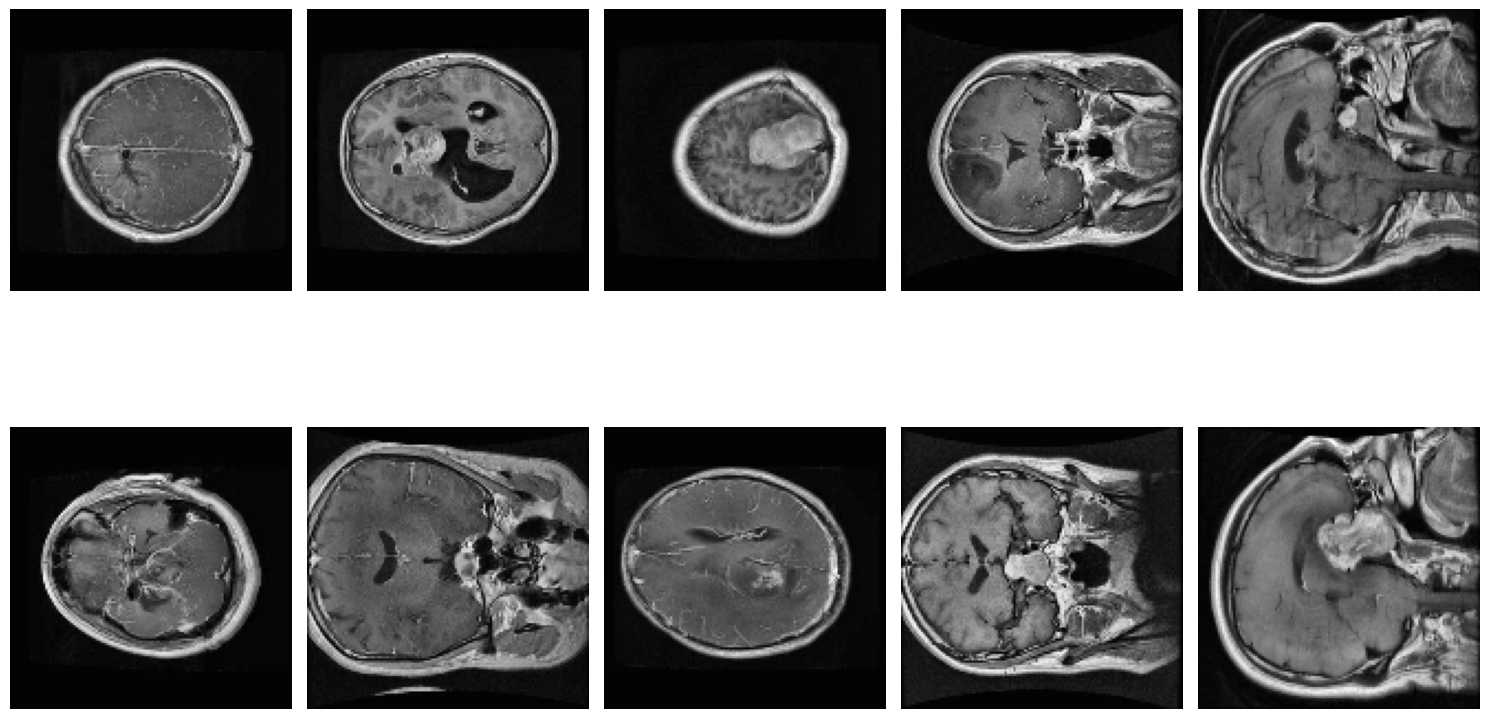

In [ ]:
# Suponiendo que tienes un dataset de tf.data.Dataset llamado 'mi_dataset'
mostrar_imagenes_aleatorias(x_val, num_imagenes=10)

In [4]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
x_data_combined = np.concatenate((x_train, x_val), axis=0)
y_data_combined = np.concatenate((y_train, y_val), axis=0)

# Mezclar los datos
x_data_combined, y_data_combined = shuffle(x_data_combined, y_data_combined, random_state=42)

# Dividir los datos en nuevos conjuntos de entrenamiento y validación
x_train_new, x_val_new, y_train_new, y_val_new = train_test_split(x_data_combined, y_data_combined, test_size=0.30, random_state=42)


In [ ]:
# Mostrar valores máximos y minimos de los pixeles
print(x_train_new.min(), x_train_new.max())
print(x_val_new.min(), x_val_new.max())

0.0 1.0
0.0 1.0


In [ ]:
# Mostramos las dimensiones y formato de las imagenes cargadas
print('\ntrain_images.shape: {}, of {}'.format(x_train_new.shape, x_train_new.dtype))
print(' test_images.shape: {}, of {}'.format(x_val_new.shape, x_val_new.dtype))


train_images.shape: (450, 128, 128, 1), of float64
 test_images.shape: (194, 128, 128, 1), of float64


In [ ]:
# Mostramos las dimensiones de los labels
print('\ntrain_labels.shape: {}, of {}'.format(y_train_new.shape, y_train_new.dtype))
print(' test_labels.shape: {}, of {}'.format(y_val_new.shape, y_val_new.dtype))


train_labels.shape: (450,), of int64
 test_labels.shape: (194,), of int64


In [ ]:
# Verificar el número de clases en y_train
num_clases_train = len(np.unique(y_train_new))
print(f"El número de clases en y_train es: {num_clases_train}")

# Verificar el número de clases en y_test
num_clases_test = len(np.unique(y_val_new))
print(f"El número de clases en y_test es: {num_clases_test}")

# Opcional: Mostrar las clases únicas en ambos conjuntos
print(f"Clases en y_train: {np.unique(y_train_new)}")
print(f"Clases en y_test: {np.unique(y_val_new)}")

El número de clases en y_train es: 2
El número de clases en y_test es: 2
Clases en y_train: [0 1]
Clases en y_test: [0 1]


In [ ]:
# Contar cuántas muestras hay por clase en y_train
clases_train, counts_train = np.unique(y_train_new, return_counts=True)
print("Conteo de muestras por clase en y_train:")
for clase, count in zip(clases_train, counts_train):
    print(f"Clase {clase}: {count} muestras")

# Contar cuántas muestras hay por clase en y_test
clases_test, counts_test = np.unique(y_val_new, return_counts=True)
print("\nConteo de muestras por clase en y_test:")
for clase, count in zip(clases_test, counts_test):
    print(f"Clase {clase}: {count} muestras")


Conteo de muestras por clase en y_train:
Clase 0: 231 muestras
Clase 1: 219 muestras

Conteo de muestras por clase en y_test:
Clase 0: 97 muestras
Clase 1: 97 muestras


In [5]:
def bbmodel_create():
  input_tensor = Input(shape=(128, 128, 1))

  x = tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3))(input_tensor)

  base_model = ResNet50(weights=None, include_top=False, input_tensor=x)

  weights_path = tf.keras.utils.get_file(
      'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
      'https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

  base_model.load_weights(weights_path, by_name=True)

  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
  x = Dropout(0.5)(x)  # Añadir dropout para regularización y evitar sobreajuste
  x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
  predictions = Dense(1, activation='sigmoid')(x)

  # Congelar todas las capas
  for layer in base_model.layers:
        layer.trainable = False

  # Congelar las capas convolucionales preentrenadas
  for layer in base_model.layers[-2:]:
      layer.trainable = True

  bbm = Model(inputs=input_tensor, outputs=predictions)

  # bbm.compile(optimizer='Adadelta', loss='binary_crossentropy', metrics=['accuracy'])
  bbm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return bbm

bbmodel = bbmodel_create()

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
def bbmodel_create():
    base_model = ResNet50(include_top=False)

    input_tensor = Input(shape=(128, 128, 3))  # Change to 3 channels for RGB

    x = tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3))(input_tensor)
    x = base_model(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(units=512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

    bbm = Model(inputs=input_tensor, outputs=predictions)

    # Unfreeze more layers for fine-tuning
    for layer in base_model.layers[:10]:  # Unfreeze first 10 layers
        layer.trainable = True

    bbm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                loss='binary_crossentropy',
                metrics=['binary_accuracy'])

    return bbm

bbmodel = bbmodel_create()

ValueError: Layer count mismatch when loading weights from file. Model expected 107 layers, found 106 saved layers.

In [ ]:
count_zeros = np.sum(y_val_new == 0)
count_zeros

97

In [8]:
def bbmodel2_creater():
    input_tensor = Input(shape=(128, 128, 1))

    # Bloque 1
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
    x = MaxPooling2D((2, 2))(x)  # Tamaño de salida: (64, 64, 32)

    # Bloque 2
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)  # Tamaño de salida: (32, 32, 64)

    # Bloque 3
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)  # Tamaño de salida: (16, 16, 128)

    # Bloque 4
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)  # Tamaño de salida: (8, 8, 256)

    # Global pooling y capa completamente conectada
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Capa de salida binaria
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=output)

    # Compilar el modelo
    model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

    return model

bbmodel = bbmodel2_creater()

In [9]:
bbmodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       7385

In [10]:
def bbmodel_fit(path_weights,epochs,model,x_train,y_train,x_val,y_val):

  checkpoint_callback = ModelCheckpoint(
      filepath=path_weights,
      monitor='val_accuracy')

  model.fit(x_train,y_train,
            batch_size=64,
            epochs=epochs,
            validation_data=(x_val, y_val),
            callbacks=[checkpoint_callback])
  return model

path_weights ='/content/drive/MyDrive/XIA_ARENA/bbmodels/models/brain_tumor/bbm/checkpoint'
model = bbmodel_fit(path_weights = path_weights,
                    epochs=50,
                    model = bbmodel,
                    x_train = x_train, y_train = y_train,
                    x_val = x_val,y_val = y_val)

Train on 429 samples, validate on 215 samples
Epoch 1/50
429/429 [==============================] - 18s 43ms/sample - loss: 0.6998 - acc: 0.5245 - val_loss: 0.6667 - val_acc: 0.8419
Epoch 2/50
429/429 [==============================] - 16s 38ms/sample - loss: 0.6465 - acc: 0.6900 - val_loss: 0.5432 - val_acc: 0.8512
Epoch 3/50
429/429 [==============================] - 16s 37ms/sample - loss: 0.5651 - acc: 0.7552 - val_loss: 0.4859 - val_acc: 0.7721
Epoch 4/50
429/429 [==============================] - 16s 37ms/sample - loss: 0.5443 - acc: 0.7552 - val_loss: 0.4249 - val_acc: 0.8419
Epoch 5/50
429/429 [==============================] - 16s 37ms/sample - loss: 0.4975 - acc: 0.7716 - val_loss: 0.4439 - val_acc: 0.7953
Epoch 6/50
429/429 [==============================] - 16s 38ms/sample - loss: 0.5238 - acc: 0.7483 - val_loss: 0.5052 - val_acc: 0.8140
Epoch 7/50
429/429 [==============================] - 16s 38ms/sample - loss: 0.5157 - acc: 0.7529 - val_loss: 0.4604 - val_acc: 0.7767
Ep

In [18]:
# guardar el modelo
model.save('/content/drive/MyDrive/XIA_ARENA/bbmodels/models/brain_tumor/bbm/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
bbmodel.load_weights('/content/drive/MyDrive/XIA_ARENA/bbmodels/models/brain_tumor/bbm/checkpoint')

In [ ]:
autoencoder.load_weights('/content/drive/MyDrive/XIA_ARENA/bbmodels/models/brain_tumor/ae/checkpoint')

In [ ]:
def ssim_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32) / 255.0
    y_pred = tf.cast(y_pred, tf.float32) / 255.0
    return tf.image.ssim(y_true, y_pred, max_val=1.0)

In [ ]:

def ae_model():
    # Encoder
    x_in = Input(shape=(640, 640, 1))

    # Bloque 1
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x_in)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # (320, 320)

    # Bloque 2
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # (160, 160)

    # Bloque 3
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # (80, 80)

    # Bloque 4
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # (40, 40)

    # Codificación final
    encoded = Conv2D(1, (3, 3), activation=None, padding='same')(x)  # (40, 40, 1)

    encoder = Model(x_in, encoded)

    # Decoder
    dec_in = Input(shape=(40, 40, 1))

    x = Conv2D(16, (3, 3), activation='relu', padding='same')(dec_in)
    x = UpSampling2D((2, 2))(x)  # (80, 80, 16)

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # (160, 160, 32)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # (320, 320, 64)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # (640, 640, 128)

    decoded = Conv2D(1, (3, 3), activation=None, padding='same')(x)  # (640, 640, 1)

    decoder = Model(dec_in, decoded)

    # Conectar encoder y decoder
    x_out = decoder(encoder(x_in))
    autoencoder = Model(x_in, x_out)

    # Compilar el modelo
    autoencoder.compile(optimizer='adam', loss='mse', metrics=[ssim_metric])

    return autoencoder, encoder, decoder

autoencoder, encoder, decoder = ae_model()

In [ ]:
import matplotlib.pyplot as plt

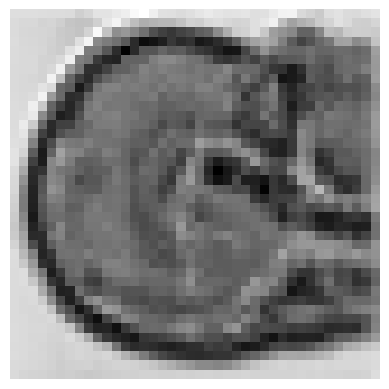

In [ ]:
plt.imshow(encoder.predict(x_val[0:1])[0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def ae_fit(path_weights,epochs,model,x_train,y_train,x_val,y_val):

  checkpoint_callback = ModelCheckpoint(
      filepath=path_weights,
      monitor='ssim_metric',
      mode='max')

  model.fit(x_train,y_train,
            batch_size=2,
            epochs=epochs,
            validation_data=(x_val, x_val),
            callbacks=[checkpoint_callback])

  return model

path_weights ='/content/drive/MyDrive/XIA_ARENA/bbmodels/models/brain_tumor/ae/checkpoint'
ae = ae_fit(path_weights = path_weights,
                    epochs=2,
                    model = autoencoder,
                    x_train =  x_val[0:10],y_train= x_val[0:10],
                    x_val = x_val[30:35], y_val = x_val[30:35])

Train on 10 samples, validate on 5 samples
Epoch 1/2
10/10 [==============================] - ETA: 0s - loss: 0.0732 - ssim_metric: 0.9893 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 159s 16s/sample - loss: 0.0732 - ssim_metric: 0.9893 - val_loss: 0.0281 - val_ssim_metric: 0.9962
Epoch 2/2
10/10 [==============================] - 142s 14s/sample - loss: 0.0247 - ssim_metric: 0.9967 - val_loss: 0.0234 - val_ssim_metric: 0.9969


# **FIN**

In [ ]:
from alibi.explainers import CounterfactualProto

In [ ]:
feature_range

(0.0, 1.0)

In [ ]:
shape = (1,) +  x_val[0:10].shape[1:]
gamma = 100.
theta = 100.
c_init = 1.
c_steps = 2
max_iterations = 1000
feature_range = ( x_val[0:10].min(), x_val[0:10].max())

In [ ]:
# initialize explainer, fit and generate counterfactual
cf = CounterfactualProto(bbmodel, x_val[0:1].shape, gamma=gamma, theta=theta,
                         ae_model=autoencoder, enc_model=encoder, max_iterations=max_iterations,
                         feature_range=feature_range, c_init=c_init, c_steps=c_steps)




In [ ]:
cf.fit( x_val[0:10])

CounterfactualProto(meta={
  'name': 'CounterfactualProto',
  'type': ['blackbox', 'tensorflow', 'keras'],
  'explanations': ['local'],
  'params': {
              'kappa': 0.0,
              'beta': 0.1,
              'gamma': 100.0,
              'theta': 100.0,
              'cat_vars': None,
              'ohe': False,
              'use_kdtree': False,
              'learning_rate_init': 0.01,
              'max_iterations': 1000,
              'c_init': 1.0,
              'c_steps': 2,
              'eps': (0.001, 0.001),
              'clip': (-1000.0, 1000.0),
              'update_num_grad': 1,
              'write_dir': None,
              'feature_range': (0.0, 1.0),
              'shape': (1, 640, 640, 1),
              'is_model': True,
              'is_ae': True,
              'is_enc': True,
              'enc_or_kdtree': True,
              'is_cat': False,
              'trustscore_kwargs': None,
              'd_type': 'abdm',
              'w': None,
              '

In [ ]:
X = x_val[0].reshape((1,) + x_val[0].shape)

In [ ]:
X.shape

(1, 640, 640, 1)

In [ ]:
shape = (1,) + x_val.shape[1:]

In [ ]:
x_val[0:1].shape

(1, 640, 640, 1)

In [ ]:
explanation = cf.explain(X)

ValueError: min() arg is an empty sequence

Propuesta de modelos
- https://huggingface.co/models?pipeline_tag=image-classification&sort=trending